In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# prompt: set wd

%cd /content/drive/MyDrive/Coursework/Applied ML


/content/drive/MyDrive/Coursework/Applied ML


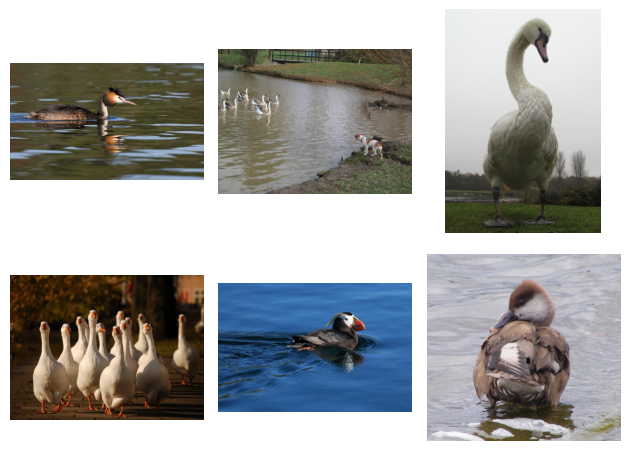

In [6]:
# plot duck photos from the ducks vs chicks dataset
from matplotlib import pyplot
from matplotlib.image import imread
import os
import random
# define location of dataset
folder = 'train/duck'



files = os.listdir(folder)

# Randomly select 6 files
selected_files = random.sample(files, 6)

# Plot the selected 6 images
for i, file in enumerate(selected_files):
    # define subplot
    pyplot.subplot(2, 3, i+1)

    # define filename
    filename = os.path.join(folder, file)

    # load image pixels
    image = imread(filename)

    # plot raw pixel data
    pyplot.imshow(image)

    # Remove ticks
    pyplot.axis('off')

# Show the figure
pyplot.tight_layout()
pyplot.show()

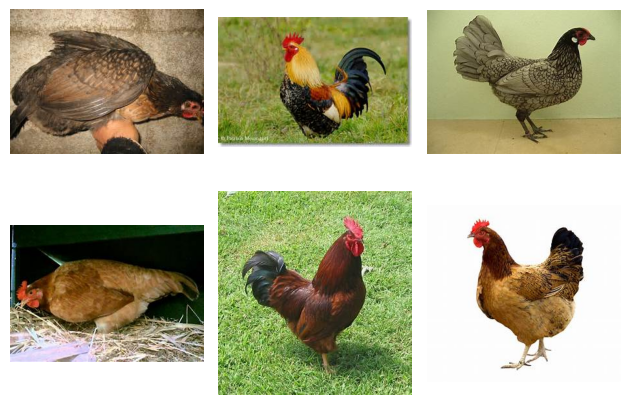

In [7]:
# plot duck photos from the ducks vs chicks dataset
from matplotlib import pyplot
from matplotlib.image import imread
import os
import random
# define location of dataset
folder = 'train/chick'



files = os.listdir(folder)

# Randomly select 6 files
selected_files = random.sample(files, 6)

# Plot the selected 6 images
for i, file in enumerate(selected_files):
    # define subplot
    pyplot.subplot(2, 3, i+1)

    # define filename
    filename = os.path.join(folder, file)

    # load image pixels
    image = imread(filename)

    # plot raw pixel data
    pyplot.imshow(image)

    # Remove ticks
    pyplot.axis('off')

# Show the figure
pyplot.tight_layout()
pyplot.show()

In [15]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model pretrained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pretrained layers so they won't be trained
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pretrained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification (e.g., dog vs cat)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Specify the directories containing the training and validation data
train_data_dir = 'train/'
validation_data_dir = 'valid/'

# Set batch size
batch_size = 32

# Create generators for loading train and validation data
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Set number of training epochs
epochs = 10

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Found 9

Found 134 images belonging to 2 classes.
3/3 [==============================] - 88s 19s/step - loss: 0.1233 - accuracy: 0.9478
Test Accuracy: 94.776


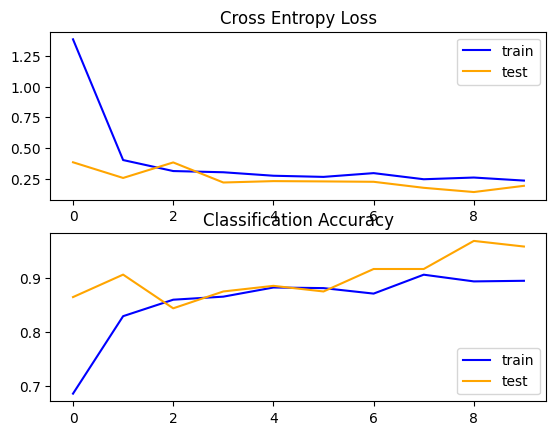

In [16]:
import sys
import numpy as np
from matplotlib import pyplot
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the saved model

# Plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history['loss'], color='blue', label='train')
    pyplot.plot(history['val_loss'], color='orange', label='test')
    pyplot.legend(['train', 'test'], loc='upper right')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history['accuracy'], color='blue', label='train')
    pyplot.plot(history['val_accuracy'], color='orange', label='test')
    pyplot.legend(['train', 'test'], loc='lower right')
    # save plot to file
    pyplot.savefig('diagnostic_learning_curves.png')
    pyplot.show()

# Run the test harness for evaluating the model
def run_test_harness():
    # Create data generator for test data
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_it = test_datagen.flow_from_directory('test/', class_mode='binary', batch_size=64, target_size=(224, 224))

    # Evaluate the model on the test data
    _, test_accuracy = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print('Test Accuracy: %.3f' % (test_accuracy * 100))

    # Plot learning curves
    summarize_diagnostics(history.history)

# Entry point, run the test harness
run_test_harness()
